# Wrapper for blueqat-julia

A. Tomiya 19th/Jan/2021 akio.tomiya_AT_riken.jp

This is a previte wrapper for blueqat-julia.

To use this notebook, you need files in https://github.com/Blueqat/blueqat-julia.
And fixed StateVectorFunctions.jl

Not all gates are supported.

In [1]:
versioninfo()

Julia Version 1.5.1
Commit 697e782ab8 (2020-08-25 20:08 UTC)
Platform Info:
  OS: macOS (x86_64-apple-darwin19.5.0)
  CPU: Intel(R) Core(TM) i5-8259U CPU @ 2.30GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-9.0.1 (ORCJIT, skylake)


In [2]:
include("./blueqat.jl")
using .blueqat

In [3]:
function Initialized_state(nqubit=1)
    return Input(nqubit)
end
function Circuit()
    return [] 
    #return Array{OneQubitGate,1} # this does not work so far
end
#
# 1-qubit gatesw
function x!(circ::Array{Any,1},i::Int64)
    push!(circ,X(i))
end
function y!(circ::Array{Any,1},i::Int64)
    push!(circ,Y(i))
end
function z!(circ::Array{Any,1},i::Int64)
    push!(circ,Z(i))
end
function h!(circ::Array{Any,1},i::Int64)
    push!(circ,H(i))
end
function s!(circ::Array{Any,1},i::Int64)
    push!(circ,S(i))
end
function t!(circ::Array{Any,1},i::Int64)
    push!(circ,T(i))
end
function m!(circ::Array{Any,1},i::Int64)
    push!(circ,M(i))
end
#
function x!(circ::Array{Any,1},iis::Array{Int64,1})
    for i in iis
        x!(circ,i)
    end
end
function y!(circ::Array{Any,1},iis::Array{Int64,1})
    for i in iis
        y!(circ,i)
    end
end
function z!(circ::Array{Any,1},iis::Array{Int64,1})
    for i in iis
        z!(circ,i)
    end
end
function h!(circ::Array{Any,1},iis::Array{Int64,1})
    for i in iis
        h!(circ,i)
    end
end
function s!(circ::Array{Any,1},iis::Array{Int64,1})
    for i in iis
        s!(circ,i)
    end
end
function t!(circ::Array{Any,1},iis::Array{Int64,1})
    for i in iis
        t!(circ,i)
    end
end
function m!(circ::Array{Any,1},iis::Array{Int64,1})
    for i in iis
        m!(circ,i)
    end
end
#
function x!(circ::Array{Any,1},iis::UnitRange{Int64})
    x!(circ,collect(iis))
end
function y!(circ::Array{Any,1},iis::UnitRange{Int64})
    y!(circ,collect(iis))
end
function z!(circ::Array{Any,1},iis::UnitRange{Int64})
    z!(circ,collect(iis))
end
function h!(circ::Array{Any,1},iis::UnitRange{Int64})
    h!(circ,collect(iis))
end
function s!(circ::Array{Any,1},iis::UnitRange{Int64})
    s!(circ,collect(iis))
end
function t!(circ::Array{Any,1},iis::UnitRange{Int64})
    t!(circ,collect(iis))
end
function m!(circ::Array{Any,1},iis::UnitRange{Int64})
    m!(circ,collect(iis))
end
# rotations on 1 qubit
function rx!(circ::Array{Any,1},i::Int64;θ::Float64)
    push!(circ,RX(i,θ))
end
function ry!(circ::Array{Any,1},i::Int64;θ::Float64)
    push!(circ,RY(i,θ))
end
function rz!(circ::Array{Any,1},i::Int64;θ::Float64)
    push!(circ,RZ(i,θ))
end
# 2-qubit gates
function cx!(circ::Array{Any,1},i::Int64,j::Int64) # i->j
    if i==j
        error("Control and target wire should be different but $i, $j")
    end
    push!(circ,CX(i,j))
end
function cz!(circ::Array{Any,1},i::Int64,j::Int64) # i->j
    if i==j
        error("Control and target wire should be different but $i, $j")
    end
    push!(circ,CZ(i,j))
end
#
function m!(circ::Array{Any,1}) # measure all
    nqubits = find_target_max(circ)
    for iwire=1:nqubits
       m!(circ,iwire) 
    end
end
#
struct ResultPack
    result::Dict{String,Int64}
    shots::Int64
end
function run(state::Input;shots=100,device_name = "StateVector")
    device = get_device(device_name);
    result = execute(state, device, shots);
    return ResultPack(get_counts(result),shots)
end
#= this does not work.
function run(circ::Array{OneQubitGate,1};shots=100,device_name = "StateVector")
    nqubit = find_target_max(circ)
    state = Initialized_state(nqubit)
    device = get_device(device_name);
    result = execute(state, device, shots);
    return ResultPack(get_counts(result),shots)
end
=#
function run(circ::Array{Any,1};shots=100,device_name = "StateVector")
    nqubit = find_target_max(circ)
    state = Initialized_state(nqubit)
    device = get_device(device_name);
    apply!(state, circ);
    result = execute(state, device, shots);
    return ResultPack(get_counts(result),shots)
end
function find_target_max(circ::Array{Any,1})
    ngates = length(circ)
    if ngates<1
        return 0
    end
    maxq=1
    for ii = 1:ngates
        tmp = circ[ii]._target
        if maxq<tmp
            maxq=tmp
        end
    end
    return maxq
end;

In [4]:
using PyPlot: plt

┌ Warning: PyPlot is using tkagg backend, which is known to cause crashes on MacOS (#410); use the MPLBACKEND environment variable to request a different backend.
└ @ PyPlot /Users/akio/.julia/packages/PyPlot/XHEG0/src/init.jl:192


In [5]:
function plot(res::Dict{String,Int64},relative=false)
    ts = keys(res)
    ys = []
    xs = collect(1:length(ts))
    for t in ts
        append!(ys,res[t])
    end
    plt.bar(xs,ys)
    plt.xticks(xs,ts)
    plt.ylabel("Counts")
    plt.show()
end;
function plot(ret::ResultPack,relative=false)
    res = ret.result
    shots = ret.shots
    ts = keys(res)
    ys = []
    xs = collect(1:length(ts))
    if !relative
        shots=1
        plt.ylabel("Counts")
    else
        plt.ylabel("Density")
    end
    for t in ts
        append!(ys,res[t]/shots)
    end
    plt.bar(xs,ys)
    plt.xticks(xs,ts)
    plt.show()
end;

In [6]:
# show circuit in AA
function visualize(circ::Array{Any,1})
    nqubit = find_target_max(circ)
    println("# nqubit = $nqubit")
    #prep wires
    AA = []
    for i = 1:nqubit
        push!(AA,"|0>-")
    end
    # gates
    if length(circ)>100
        error("Too many gates to visualize!")
    end
    for igate=1:length(circ)
        # two qubits
        if (circ[igate]._name=="CX")|(circ[igate]._name=="CZ")
            iwire_c=circ[igate]._control
            iwire_t=circ[igate]._target
            if circ[igate]._name=="CX"
                AA[iwire_t]*="x-"
            elseif circ[igate]._name=="CZ"
                AA[iwire_t]*="z-"
            end
            AA[iwire_c]*="c-" # control
            for i=1:nqubit
                if (i!=iwire_t)&(i!=iwire_c)
                    if min(iwire_t,iwire_c)<i<max(iwire_t,iwire_c)
                        AA[i]*="|-"  #empty wire
                    else
                        AA[i]*="--"  #empty wire
                    end
                end
            end
            continue
        end
        iwire=circ[igate]._target
        if circ[igate]==""
            continue
        elseif circ[igate]._name=="M"
            AA[iwire]*=circ[igate]._name#*"_"
            continue
        elseif (circ[igate]._name=="RX")
            AA[iwire]*="Rx"
        elseif (circ[igate]._name=="RY")
            AA[iwire]*="Ry"
        elseif (circ[igate]._name=="RZ")
            AA[iwire]*="Rz"
        else
            AA[iwire]*=circ[igate]._name*"-"
        end
        for i=1:nqubit
            if i!=iwire
               AA[i]*="--"  #empty wire
            end
        end
    end
    # plot
    for a in AA
       println("$(a)")
    end
end;

- - -  

# use example

In [7]:
c = Circuit() 
h!(c,1:2)
m!(c);
visualize(c)

# nqubit = 2
|0>-H---M
|0>---H-M


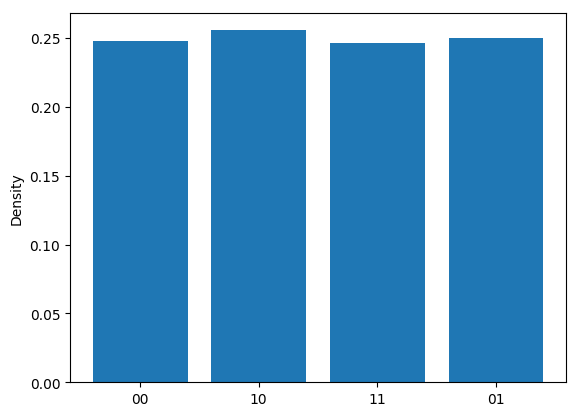

In [8]:
result = run(c,shots=10^4)
plot(result,true)

Another example

In [9]:
Nqubit= 7
# = = = = =
c = Circuit() 
for iwire=1:Nqubit
    if iwire%2==0
        h!(c,iwire);
    end
    if iwire%3==0
        x!(c,iwire);
    end
    h!(c,iwire);
end
x!(c,1:3)
cx!(c,3,1);
cz!(c,1,4);
cx!(c,7,3);
cx!(c,4,1);
rx!(c,5,θ=0.1);
ry!(c,2,θ=0.2);
rz!(c,5,θ=0.3);
m!(c,1:2);
m!(c,5);
# = = = = =
visualize(c)

# nqubit = 7
|0>-H-----------------------X-----x-c---x-------M
|0>---H-H---------------------X---|-|---|---Ry--M
|0>-------X-H-------------------X-c-|-x-|-------
|0>-----------H-H-------------------z-|-c-------
|0>---------------H-------------------|---Rx--RzM
|0>-----------------H-X-H-------------|---------
|0>-----------------------H-----------c---------


In [10]:
run(c)

ResultPack(Dict("00000" => 1,"01000" => 25,"11000" => 22,"11001" => 24,"01001" => 28), 100)

In [11]:
result = run(c,shots=10^4)
result

ResultPack(Dict("00000" => 31,"01000" => 2454,"10000" => 28,"00001" => 33,"10001" => 25,"11000" => 2466,"11001" => 2490,"01001" => 2473), 10000)

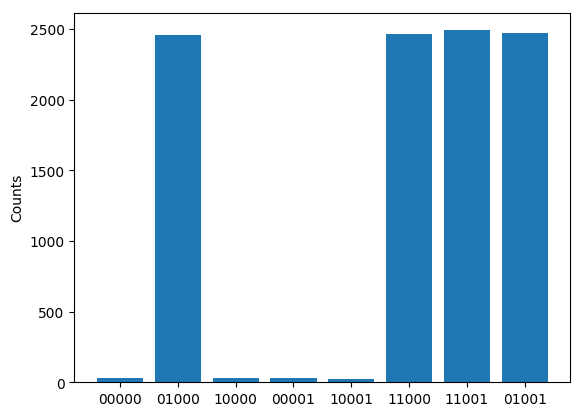

In [12]:
plot(result)